In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#import seaborn as sns

In [78]:
df = pd.read_csv("df_valid.csv")
df = df.rename(columns={"context_grp_1": "context_group"})
df

,Unnamed: 0,id,anchor,target,context,score,context_group,text_grp_1,text,score_map,fold,pred
0,0,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,A,HUMAN NECESSITIES,A[SEP]abatement[SEP]forest regionSEP,0,0,0.001300
1,1,ef2d4c2e6bbb208d,abatement,mixing core materials,A47,0.25,A,HUMAN NECESSITIES,A[SEP]abatement[SEP]mixing core materialsSEP,1,0,0.164885
2,2,4c3f2750e7540ab7,abatement,multi pollution abatement device,A47,0.50,A,HUMAN NECESSITIES,A[SEP]abatement[SEP]multi pollution abatement ...,2,0,0.501689
3,3,bfd7270f57530991,abatement,pollution abatement,A47,0.50,A,HUMAN NECESSITIES,A[SEP]abatement[SEP]pollution abatementSEP,2,0,0.504240
4,4,cc96541d4987b399,abatement,rent abatement,A47,0.00,A,HUMAN NECESSITIES,A[SEP]abatement[SEP]rent abatementSEP,0,0,0.219177
...,...,...,...,...,...,...,...,...,...,...,...,...
36468,36468,ede41dd2a61bb0a9,wood article,substrate,B44,0.25,B,PERFORMING OPERATIONS; TRANSPORTING,B[SEP]wood article[SEP]substrateSEP,1,3,0.289886
36469,36469,4f366b6369dbfbf2,wood article,timber article,B44,0.75,B,PERFORMING OPERATIONS; TRANSPORTING,B[SEP]wood article[SEP]timber articleSEP,3,3,0.815685
36470,36470,51421420985d5c93,wood article,wood,B44,0.50,B,PERFORMING OPERATIONS; TRANSPORTING,B[SEP]wood article[SEP]woodSEP,2,3,0.577281
36471,36471,8ceaa2b5c2d56250,wood article,wood article,B44,1.00,B,PERFORMING OPERATIONS; TRANSPORTING,B[SEP]wood article[SEP]wood articleSEP,4,3,0.997972


In [79]:
def find_jaccard_index(df_row):
    target_set = set(df_row["target"].split())
    anchor_set = set(df_row["anchor"].split())
    return len(anchor_set.intersection(target_set)) / len(anchor_set.union(target_set))

def subset(df_row, col_a, col_b):
    return (df_row[col_a] in df_row[col_b]) and (len(df_row[col_b]) > len(df_row[col_a]))

def fuzz_ratio(df_row, col_a, col_b):
    return fuzz.ratio(df_row[col_a], df_row[col_b]) / 100

def fuzz_partial_ratio(df_row, col_a, col_b):
    return fuzz.partial_ratio(df_row[col_a], df_row[col_b]) / 100

def fuzz_token_set_ratio(df_row, col_a, col_b):
    return fuzz.token_set_ratio(df_row[col_a], df_row[col_b]) / 100

def fuzz_token_sort_ratio(df_row, col_a, col_b):
    return fuzz.token_sort_ratio(df_row[col_a], df_row[col_b]) / 100


In [80]:
df[["context_group", "text_grp_1"]].drop_duplicates().sort_values("context_group").reset_index(drop=True)

,context_group,text_grp_1
0,A,HUMAN NECESSITIES
1,B,PERFORMING OPERATIONS; TRANSPORTING
2,C,CHEMISTRY; METALLURGY
3,D,TEXTILES; PAPER
4,E,FIXED CONSTRUCTIONS
5,F,MECHANICAL ENGINEERING; LIGHTING; HEATING; WEA...
6,G,PHYSICS
7,H,ELECTRICITY


In [81]:
# New features

In [82]:
df["number_of_words"] = df["target"].str.split().apply(len).values

In [83]:
df["jaccard_index"] = df.apply(find_jaccard_index, axis=1)
df[["target", "anchor", "jaccard_index"]]

df["anchor ⊂ target"] = df.apply(subset, args=("anchor","target"), axis=1)
df["target ⊂ anchor"] = df.apply(subset, args=("target","anchor"), axis=1)

df["bias"] = df["pred"] - df["score"]
df["abs_error"] = df["bias"].abs()
df.head()

,Unnamed: 0,id,anchor,target,context,score,context_group,text_grp_1,text,score_map,fold,pred,number_of_words,jaccard_index,anchor ⊂ target,target ⊂ anchor,bias,abs_error
0,0,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,A,HUMAN NECESSITIES,A[SEP]abatement[SEP]forest regionSEP,0,0,0.001300,2,0.00,False,False,0.001300,0.001300
1,1,ef2d4c2e6bbb208d,abatement,mixing core materials,A47,0.25,A,HUMAN NECESSITIES,A[SEP]abatement[SEP]mixing core materialsSEP,1,0,0.164885,3,0.00,False,False,-0.085115,0.085115
2,2,4c3f2750e7540ab7,abatement,multi pollution abatement device,A47,0.50,A,HUMAN NECESSITIES,A[SEP]abatement[SEP]multi pollution abatement ...,2,0,0.501689,4,0.25,True,False,0.001689,0.001689
3,3,bfd7270f57530991,abatement,pollution abatement,A47,0.50,A,HUMAN NECESSITIES,A[SEP]abatement[SEP]pollution abatementSEP,2,0,0.504240,2,0.50,True,False,0.004240,0.004240
4,4,cc96541d4987b399,abatement,rent abatement,A47,0.00,A,HUMAN NECESSITIES,A[SEP]abatement[SEP]rent abatementSEP,0,0,0.219177,2,0.50,True,False,0.219177,0.219177


In [84]:
# Performance

In [85]:
df[["pred", "score"]].corr()

,pred,score
pred,1.00000,0.83982
score,0.83982,1.00000


In [87]:
# The smallest biases
df[["id", "anchor", "target", "context_group", "text_grp_1", "text", "pred", "score", "bias"]].sort_values("bias").head(10)

,id,anchor,target,context_group,text_grp_1,text,pred,score,bias
13676,f2c04b2f36b64c99,lifting load,lifting shipment,B,PERFORMING OPERATIONS; TRANSPORTING,B[SEP]lifting load[SEP]lifting shipmentSEP,0.000329,0.75,-0.749671
14039,47ee0606566a670c,measure by probe,measure by search,G,PHYSICS,G[SEP]measure by probe[SEP]measure by searchSEP,0.000457,0.75,-0.749543
29401,74661910ab47e9b5,coupling factor,quality factor,H,ELECTRICITY,H[SEP]coupling factor[SEP]quality factorSEP,0.000560,0.75,-0.749440
27390,eb44d02ca330b2b5,abnormal position,abnormal presentations,E,FIXED CONSTRUCTIONS,E[SEP]abnormal position[SEP]abnormal presentat...,0.000586,0.75,-0.749414
19702,582f21e12df5189b,collator,organize,B,PERFORMING OPERATIONS; TRANSPORTING,B[SEP]collator[SEP]organizeSEP,0.000860,0.75,-0.749140
34248,a423f51627c66e7a,resilient metal,resilient form,E,FIXED CONSTRUCTIONS,E[SEP]resilient metal[SEP]resilient formSEP,0.000907,0.75,-0.749093
2056,6a0a636d9d2f3c96,dac system,dac line diver,H,ELECTRICITY,H[SEP]dac system[SEP]dac line diverSEP,0.000942,0.75,-0.749058
273,9ec6ad179a2c0893,alpha gypsum,caso4,B,PERFORMING OPERATIONS; TRANSPORTING,B[SEP]alpha gypsum[SEP]caso4SEP,0.001167,0.75,-0.748833
23434,4df5f8a4b2f23dd3,multiplexed data,multiplex date,H,ELECTRICITY,H[SEP]multiplexed data[SEP]multiplex dateSEP,0.001327,0.75,-0.748673
14422,f9ecf3fead869647,normal base,normal bed,B,PERFORMING OPERATIONS; TRANSPORTING,B[SEP]normal base[SEP]normal bedSEP,0.001952,0.75,-0.748048


In [88]:
# The largest biases
df[["id", "anchor", "target", "context_group", "text_grp_1", "text", "pred", "score", "bias"]]\
.sort_values("bias", ascending=False).head(10)

,id,anchor,target,context_group,text_grp_1,text,pred,score,bias
2428,5ad513a964e9d0a6,dissolving,dissolution,C,CHEMISTRY; METALLURGY,C[SEP]dissolving[SEP]dissolutionSEP,0.995553,0.00,0.995553
919,f297ea79eab86071,boom hydraulic cylinder,boom a hydraulic cylinder,E,FIXED CONSTRUCTIONS,E[SEP]boom hydraulic cylinder[SEP]boom a hydra...,0.991835,0.00,0.991835
4055,20a45b67a785caf3,imaging axis,imaging of axis,G,PHYSICS,G[SEP]imaging axis[SEP]imaging of axisSEP,0.944695,0.00,0.944695
33984,6af4f2d9506545f2,punch face,face punch,B,PERFORMING OPERATIONS; TRANSPORTING,B[SEP]punch face[SEP]face punchSEP,0.865455,0.00,0.865455
28658,3c8e8b15d2721b27,channel vectors,channel of vectors,H,ELECTRICITY,H[SEP]channel vectors[SEP]channel of vectorsSEP,0.849167,0.00,0.849167
33927,a87c4328a7e5ae15,provider networks,provider network ns,H,ELECTRICITY,H[SEP]provider networks[SEP]provider network n...,0.829301,0.00,0.829301
23327,0ff2042fdefd5434,microchambers,microvessels,H,ELECTRICITY,H[SEP]microchambers[SEP]microvesselsSEP,0.778984,0.00,0.778984
33429,6ffb2bf0b2fa6d62,pictorial image,pictorial representation,G,PHYSICS,G[SEP]pictorial image[SEP]pictorial representa...,0.759221,0.00,0.759221
19530,eb07124e099d27d6,chip form,form chip,D,TEXTILES; PAPER,D[SEP]chip form[SEP]form chipSEP,0.968851,0.25,0.718851
21892,cd8dce070b0d7650,glycitin,glucitol,B,PERFORMING OPERATIONS; TRANSPORTING,B[SEP]glycitin[SEP]glucitolSEP,0.710646,0.00,0.710646


In [90]:
df[["id", "anchor", "pred", "score"]].sort_values("pred", ascending=False).head()

,id,anchor,pred,score
18197,57dea28538854ce9,wire grid polarization,0.998877,1.0
11652,aa1ba612905a4c06,double planetary gear,0.998783,1.0
20694,e85fb48e21370ea7,distributor pipe,0.998754,1.0
26826,7f794cd0309d88a2,upper clamp arm,0.998748,1.0
19456,9496d5347a243620,central flow path,0.998738,1.0


In [91]:
# Define rounding method
#df["pred_round"] = np.round(df["pred"]*4)/4
#df[["pred", "pred_round", "score"]]

In [92]:
#df[["pred", "pred_round", "score"]].corr()

In [93]:
#df[["pred", "pred_round", "score"]].plot.scatter(x="score",y="pred", figsize=(12,8))

In [94]:
# MAE of ordinary method
(df["pred"] - df["score"]).abs().mean()

0.09667650270277192

In [95]:
#(df["pred_round"] - df["score"]).abs().mean()

In [96]:
# SD of AE of ordinary method
(df["pred"] - df["score"]).abs().std()

0.10985923581813972

In [97]:
#(df["pred_round"] - df["score"]).abs().std()

In [98]:
# MSE of ordinary method
((df["pred"] - df["score"])**2).mean()

0.021415066965656065

In [99]:
#((df["pred_round"] - df["score"])**2).mean()

In [100]:
((df["pred"] - df["score"])**2).std()

0.04772756243149896

In [101]:
#((df["pred_round"] - df["score"])**2).std()

In [103]:

anchor_bias_DF = pd.DataFrame(df.groupby("text_grp_1")["bias"].mean().sort_values()).rename(columns={"bias": "mean_bias"})
anchor_bias_SD_DF = pd.DataFrame(df.groupby("text_grp_1")["bias"].std().sort_values()).rename(columns={"bias": "bias_sd"})
anchor_mae_DF = pd.DataFrame(df.groupby("text_grp_1")["abs_error"].mean().sort_values()).rename(columns={"abs_error": "mae"})

anchor_count_DF = pd.DataFrame(df.groupby("text_grp_1")["anchor"].count().sort_values()).rename(columns={"anchor": "count"})


In [104]:
anchor_bias_DF.merge(anchor_bias_SD_DF, on="text_grp_1")\
              .merge(anchor_count_DF, on="text_grp_1")\
             .merge(anchor_mae_DF, on="text_grp_1")\
.sort_values("count")

,mean_bias,bias_sd,count,mae
text_grp_1,,,,
TEXTILES; PAPER,0.030432,0.150099,1279,0.099155
FIXED CONSTRUCTIONS,0.019426,0.142898,1531,0.095724
MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING,0.024430,0.135981,4054,0.090620
HUMAN NECESSITIES,0.022580,0.147178,4094,0.099129
CHEMISTRY; METALLURGY,0.021099,0.143862,5288,0.100178
PHYSICS,0.025320,0.163747,6013,0.115338
ELECTRICITY,0.023781,0.151877,6195,0.104407
PERFORMING OPERATIONS; TRANSPORTING,0.020379,0.124672,8019,0.075998


In [106]:
anchor_bias_DF

,mean_bias
text_grp_1,
FIXED CONSTRUCTIONS,0.019426
PERFORMING OPERATIONS; TRANSPORTING,0.020379
CHEMISTRY; METALLURGY,0.021099
HUMAN NECESSITIES,0.022580
ELECTRICITY,0.023781
MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING,0.024430
PHYSICS,0.025320
TEXTILES; PAPER,0.030432


(array([-0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,
         0.035]),
 <a list of 9 Text yticklabel objects>)

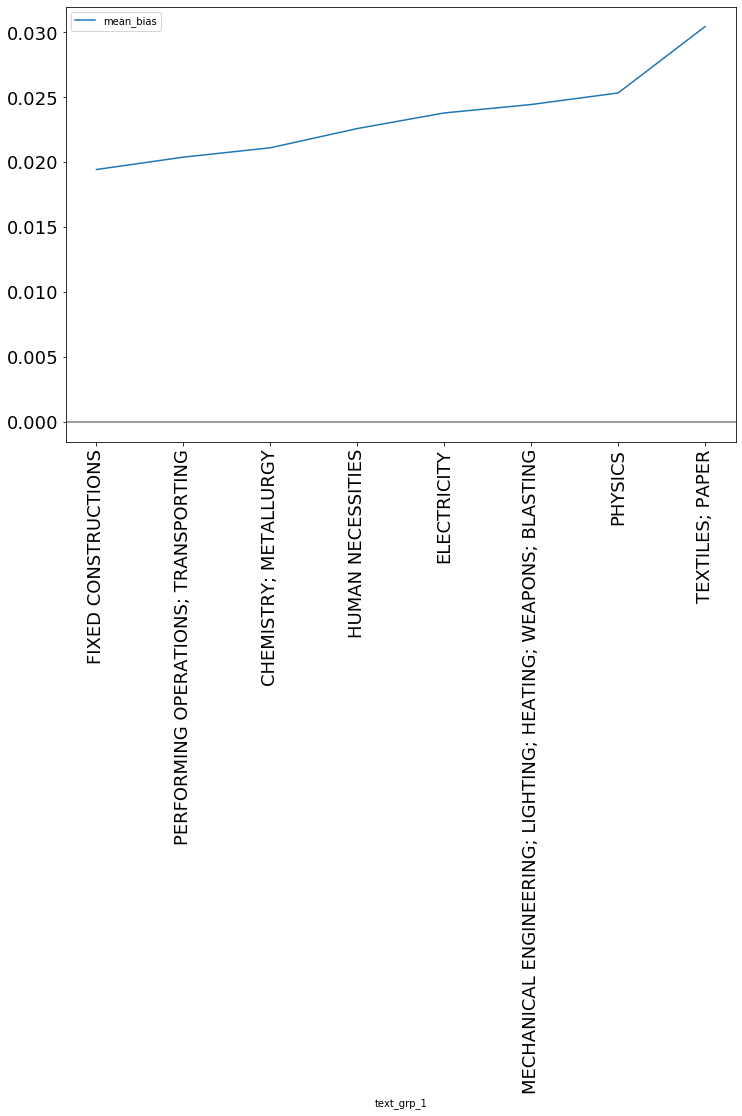

In [109]:
anchor_bias_DF.plot(fontsize=18, figsize=(12, 8))
plt.axhline(0.0, color="grey") 
plt.xticks(fontsize=18, rotation = 90)
plt.yticks(fontsize=18)

In [ ]:
# Distribution

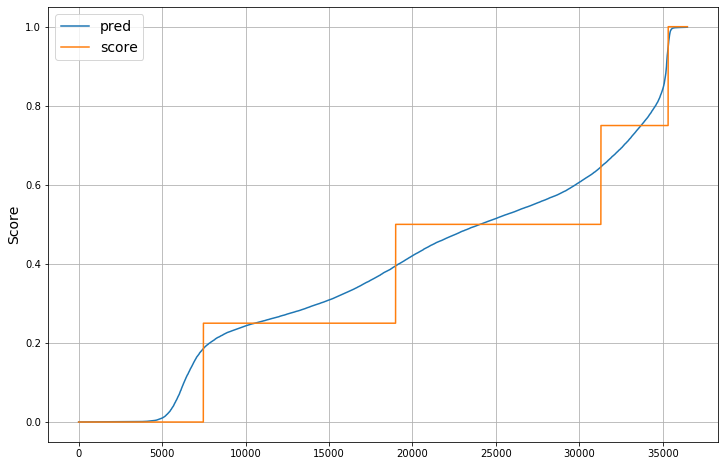

In [111]:
plt.figure(figsize=(12,8))
plt.plot(df.sort_values("pred")[["pred"]].reset_index(drop=True))
plt.plot(df.sort_values("score")[["score"]].reset_index(drop=True))
plt.grid()
plt.ylabel("Score", fontsize=14)
plt.legend(["pred", "score"], fontsize=14)

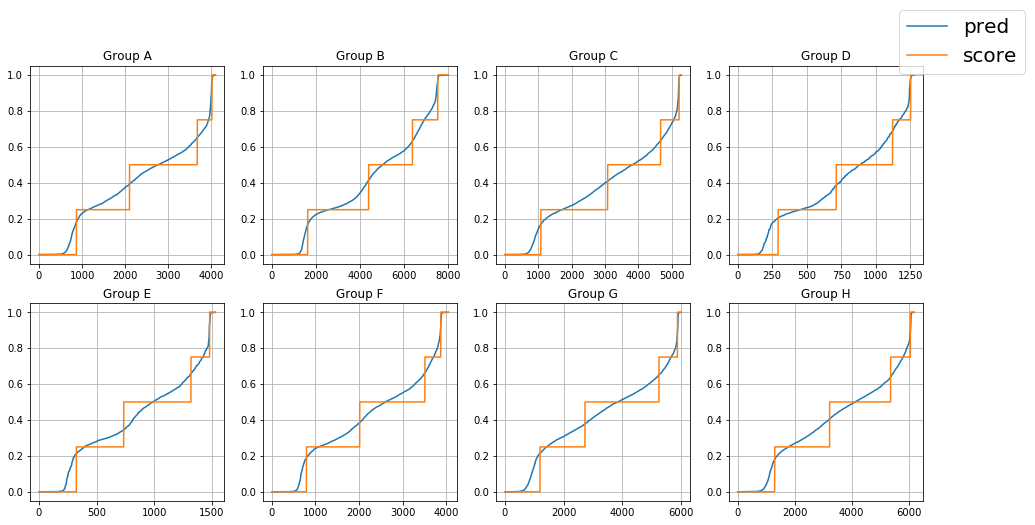

In [112]:
fig, axs = plt.subplots(2,4, figsize=(16,8))
gp_list = sorted(df["context_group"].unique())

for i, ax in enumerate(axs.flatten()):
    sub_df = df[df["context_group"]==gp_list[i]]
    ax.plot(sub_df.sort_values("pred")[["pred"]].reset_index(drop=True))
    ax.plot(sub_df.sort_values("score")[["score"]].reset_index(drop=True))
    ax.grid()
    ax.set_title("Group "+gp_list[i])
fig.legend(["pred", "score"], fontsize=20) 

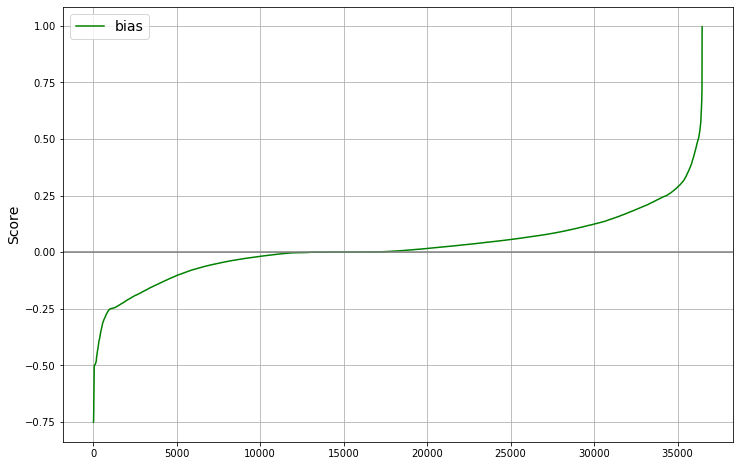

In [113]:
plt.figure(figsize=(12,8))
plt.plot(df.sort_values("bias")[["bias"]].reset_index(drop=True), color="green")
plt.grid()
plt.ylabel("Score", fontsize=14)
plt.axhline(color="grey")
plt.legend(["bias"], fontsize=14)

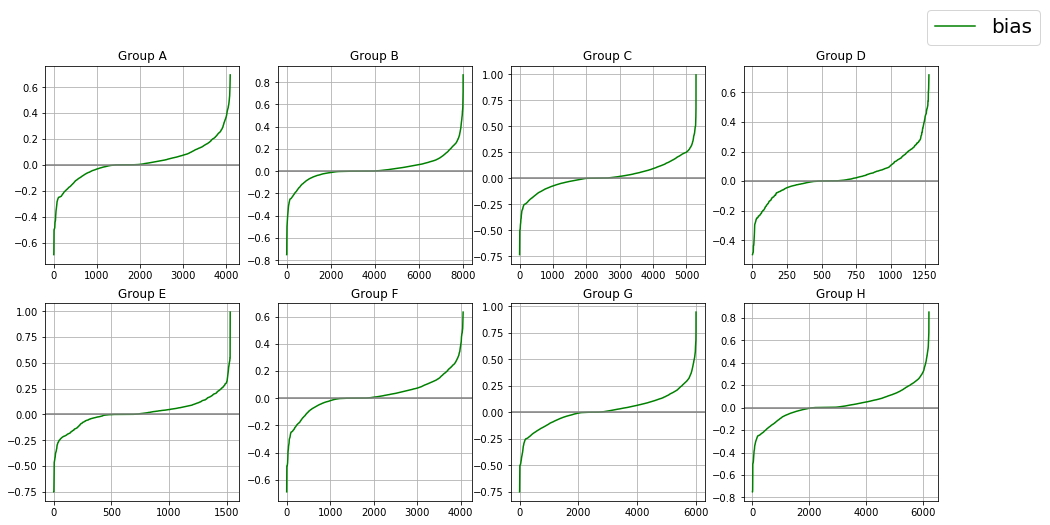

In [114]:
fig, axs = plt.subplots(2,4, figsize=(16,8))
gp_list = sorted(df["context_group"].unique())

for i, ax in enumerate(axs.flatten()):
    sub_df = df[df["context_group"]==gp_list[i]]
    ax.plot(sub_df.sort_values("bias")[["bias"]].reset_index(drop=True), color="green")
    ax.grid()
    ax.axhline(color="grey")
    ax.set_title("Group "+gp_list[i])
fig.legend(["bias"], fontsize=20) 

In [115]:
# Consider "anchor ⊂ target" and "target ⊂ anchor"

In [116]:
gp1_df = df.groupby(["context_group"])["pred", "score", "bias", "abs_error"].mean().reset_index()
gp1_df

/home/ansontang/miniconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,context_group,pred,score,bias,abs_error
0,A,0.372360,0.349780,0.022580,0.099129
1,B,0.398980,0.378601,0.020379,0.075998
2,C,0.357001,0.335902,0.021099,0.100178
3,D,0.369369,0.338937,0.030432,0.099155
4,E,0.389609,0.370183,0.019426,0.095724
5,F,0.395484,0.371053,0.024430,0.090620
6,G,0.399259,0.373940,0.025320,0.115338
7,H,0.380238,0.356457,0.023781,0.104407


In [117]:
gp2_df = df.groupby(["context_group", "anchor ⊂ target"])["pred", "score", "bias", "abs_error"].mean().unstack(1).reset_index()
gp2_df

/home/ansontang/miniconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


context_group      pred               score            \
anchor ⊂ target                   False      True     False      True   
0                           A  0.361212  0.560517  0.338292  0.543668   
1                           B  0.387043  0.639611  0.367539  0.601583   
2                           C  0.347748  0.609394  0.327485  0.565508   
3                           D  0.358203  0.571356  0.328589  0.526119   
4                           E  0.381192  0.619837  0.362221  0.587963   
5                           F  0.382403  0.621269  0.358168  0.593468   
6                           G  0.390702  0.544306  0.363993  0.542537   
7                           H  0.368804  0.595101  0.344313  0.584665   

                     bias           abs_error            
anchor ⊂ target     False      True     False      True  
0                0.022919  0.016849  0.099695  0.089577  
1                0.019504  0.038028  0.075558  0.084872  
2                0.020263  0.043886  0.100298  0.096929  
3                0.029614  0.045236  0.099109  0.099985  
4                0.018971  0.031874  0.096649  0.070415  
5                0.024235  0.027801  0.090718  0.088918  
6                0.026709  0.001769  0.114516  0.129271  
7                0.024491  0.010436  0.105015  0.092984

In [118]:
gp3_df = df.groupby(["context_group", "target ⊂ anchor"])["pred", "score", "bias", "abs_error"].mean().unstack(1).reset_index()
gp3_df

/home/ansontang/miniconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


context_group      pred               score            \
target ⊂ anchor                   False      True     False      True   
0                           A  0.365323  0.527168  0.342377  0.512640   
1                           B  0.391680  0.560857  0.371758  0.530347   
2                           C  0.351966  0.474653  0.332923  0.405530   
3                           D  0.362160  0.495777  0.331612  0.467391   
4                           E  0.383693  0.542590  0.363636  0.539474   
5                           F  0.389177  0.537829  0.364760  0.513081   
6                           G  0.393452  0.534819  0.368366  0.504049   
7                           H  0.375195  0.512808  0.351919  0.475771   

                     bias           abs_error            
target ⊂ anchor     False      True     False      True  
0                0.022946  0.014527  0.101064  0.056561  
1                0.019922  0.030511  0.076839  0.057363  
2                0.019043  0.069123  0.099606  0.113556  
3                0.030549  0.028386  0.100667  0.072647  
4                0.020057  0.003117  0.097831  0.041226  
5                0.024416  0.024748  0.092363  0.051270  
6                0.025086  0.030770  0.117491  0.065074  
7                0.023277  0.037037  0.105074  0.086871

/home/ansontang/miniconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ansontang/miniconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


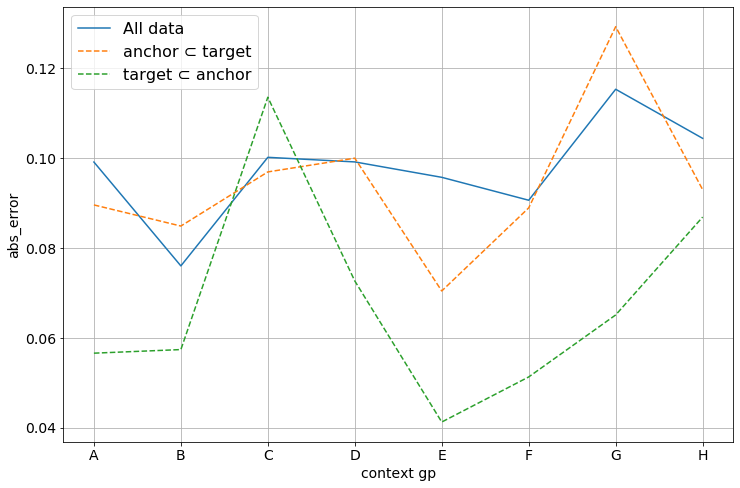

In [119]:
fig = plt.figure(figsize=(12,8))

temp_df2 = df.groupby(["context_group", "anchor ⊂ target"])["pred", "score", "bias", "abs_error"].mean().reset_index()
temp_df2 = temp_df2[temp_df2["anchor ⊂ target"] == True]

temp_df3 = df.groupby(["context_group", "target ⊂ anchor"])["pred", "score", "bias", "abs_error"].mean().reset_index()
temp_df3 = temp_df3[temp_df3["target ⊂ anchor"] == True]


plt.plot(gp1_df["context_group"], gp1_df["abs_error"])
plt.plot(temp_df2["context_group"], temp_df2["abs_error"], linestyle="--")
plt.plot(temp_df3["context_group"], temp_df3["abs_error"], linestyle="--")


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("context gp", fontsize=14)
plt.ylabel("abs_error", fontsize=14)

plt.grid()

plt.legend(["All data", "anchor ⊂ target", "target ⊂ anchor"], fontsize=16)



In [121]:
# jaccard_index

In [122]:
df[["pred", "score", "jaccard_index", "bias", "abs_error"]].corr()

,pred,score,jaccard_index,bias,abs_error
pred,1.000000,0.839820,0.429993,0.242076,0.151472
score,0.839820,1.000000,0.391743,-0.323418,0.032791
jaccard_index,0.429993,0.391743,1.000000,0.049353,-0.028252
bias,0.242076,-0.323418,0.049353,1.000000,0.205421
abs_error,0.151472,0.032791,-0.028252,0.205421,1.000000
